In [31]:
import numpy as np
np.random.seed(1234556)

from graspologic.inference import LatentPositionTest, lpt_function
from graspologic.embed import AdjacencySpectralEmbed
from graspologic.simulations import sbm, rdpg
from graspologic.utils import symmetrize
from graspologic.plot import heatmap, pairplot
from matplotlib import pyplot as plt
import pandas as pd

%matplotlib inline

In [32]:
n_components = 4 # the number of embedding dimensions for ASE
P = np.array([[0.9, 0.11, 0.13, 0.2],
              [0, 0.7, 0.1, 0.1],
              [0, 0, 0.8, 0.1],
              [0, 0, 0, 0.85]])

P = symmetrize(P)
p_vals_class = []
p_vals_function = []
p_val_diff = []
n_verts_list = []

In [33]:
for n in range(50, 201, 10):
    n_verts_list.append(n)
    p_val_class = 0
    p_val_function = 0
    for _ in range(100):
        
        A = sbm([n]*4, P)
        X = AdjacencySpectralEmbed(n_components=n_components).fit_transform(A)
        A1 = rdpg(X,
              loops=False,
              rescale=False,
              directed=False)
        A2 = rdpg(X,
              loops=False,
              rescale=False,
              directed=False)
        lpt_class = LatentPositionTest(n_bootstraps=200, n_components=n_components)
        lpt_class.fit(A1, A2)
        p_val_class += lpt_class.p_value_

        p_val, _, _ = lpt_function(A1, A2, n_bootstraps=200, n_components=n_components)
        p_val_function += p_val
    
    print("c: {}".format(p_val_class))
    print("f: {}".format(p_val_function))
    p_val_class /= 25 
    p_val_function /= 25
    p_vals_class.append(p_val_class)
    p_vals_function.append(p_val_function)
    p_val_diff.append(p_val_class-p_val_function)
    
p_vals_dict = {"p-values class": p_vals_class, "p-values function": p_vals_function}
df = pd.DataFrame(p_vals_dict)
df.to_csv('p_values_lpt.csv')

c: 65.35820895522389
f: 64.94029850746271
c: 61.93034825870647
f: 61.64179104477611
c: 60.62686567164179
f: 61.01990049751244
c: 57.79104477611939
f: 57.81592039800994
c: 59.44776119402987
f: 59.71641791044777
c: 57.07960199004976
f: 56.91542288557215
c: 50.00497512437813
f: 49.13432835820899
c: 57.02487562189057
f: 57.24875621890547
c: 57.85074626865671
f: 58.109452736318396
c: 44.01990049751241
f: 44.01990049751243
c: 49.691542288557216
f: 49.74129353233833
c: 47.97014925373135
f: 48.44776119402984
c: 51.27860696517414
f: 51.25870646766169
c: 48.50248756218905
f: 48.22388059701493
c: 50.233830845771145
f: 49.751243781094516
c: 50.29353233830847
f: 50.477611940298495


In [34]:
print(len(p_val_diff))
print(len(n_verts_list))

16
16


In [35]:
print(n_verts_list)
print(p_val_diff)

[50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]
[0.016716417910446868, 0.011542288557214064, -0.015721393034826114, -0.0009950248756220859, -0.01074626865671613, 0.006567164179104079, 0.034825870646765456, -0.008955223880596108, -0.010348258706467828, -8.881784197001252e-16, -0.001990049751244616, -0.019104477611939563, 0.0007960199004983792, 0.011144278606964653, 0.019303482587065046, -0.007363184079601126]


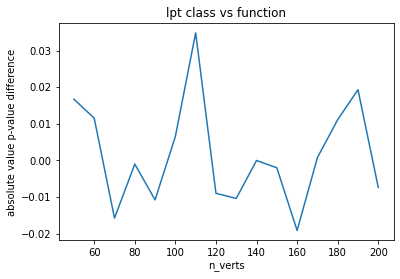

In [36]:
plt.plot(n_verts_list, p_val_diff)
plt.xlabel("n_verts")
plt.ylabel("absolute value p-value difference")
plt.title("lpt class vs function")
plt.show()